#### *For the sake of safeguarding privacy and confidentiality, certain identifying information, including names and student numbers, has been intentionally withheld.*

### Participants:

##### *- Danial Ramzan
##### - L. L.
##### - X. L.

## Title:

Predictions of pulsar legitimacy using classification

## Introduction:

Pulsars are a rare physical phenomenon that are of great scientific significance. They are "highly magnetized, rotating neutron stars that emit beams of electromagnetic radiation out of their magnetic poles" (Lyne & Graham-Smith, 2012). As such, astronomers have been interested in detecting these signals as explorations into space, time, and states of matter. These varying signals can be averaged over many rotations for the same pulsar to yield a potential signal detection known as a ‘candidate’, which is what we are specifically concerned with for this investigation.
In a dataset obtained from the UK Engineering and Physical Sciences Research Council (EPSRC), candidates are split into ‘positive’ and ‘negative’ examples, indicating whether they are legitimate or invalid, respectively. The raw data was collected by the High Time Resolution Universe Collaboration with the Parkes Observatory, Australia, and includes a total of 17 898 examples to study. Each candidate in the dataset is represented by a set of 9 total variables (the last one being Class), with the first 8 being statistical descriptors such as mean, standard deviation, and kurtosis of the averaged profiles. The use of machine learning can therefore use these variables as predictors of whether or not candidates should be classified as pulsars. This entails the use of training data from which the computer can learn predictor rules, generate a model, and use this model for predictions (Chen et al., 2020).
Using this, our overarching aim is to test the legitimacy of their designation, and see whether candidates are truly pulsars by classifying the data into testing and training sets to compare predicted and actual values.  
  



## Methods & Results
In order to import and read our dataset from its host website (Raj, 2020), our first step was to load the ‘readr’, ‘utils’, ‘tidyverse’, ‘repr’, ‘tidymodels’, ‘themis’, and ‘kknn’ packages in our Jupyter notebook. A URL was set for the zip file for downloading and extracting within our working directory, using the ‘utils’ package, and the .csv file was read. For a clearer idea of the variables and how to reformat them into a tidy dataset, we viewed the first few rows of the data, then assigned column names to each one with more legible and fluent designations for people to understand more intuitively.

<br>
Based on the Attribute Information section of the dataset web page, these 8 variables were named as follows: Mean of the integrated profile, Standard deviation of the integrated profile, Excess kurtosis of the integrated profile, Skewness of the integrated profile, mean of the DM-SNR curve, Standard deviation of the DM-SNR curve, Excess Kurtosis of the DM SNR Curve, Skewness of the DM-SNR curve. These variables are all continuous and decimal-type, except for Class which we will assign as an integer to denote whether or not a candidate is a pulsar.  The first four variables represent a statistic from the integrated profile, with the last 4 having been obtained from the DM-SNR curve. An integrated pulse profile represents the energy profile through the electromagnetic spectrum, made up from hundreds or thousands of individual pulses (Lyne & Graham Smith, 2012). These profiles are unique among pulsars, depending on the energy of wave signals detected (from low-energy radio to high-energy gamma). We also removed any white space characters for easier plots and visualization.
<br><br>
In preparation for modeling and classification, the tidied data was separated into training and testing datasets, using a 75/25 split in order to avoid overfitting and to have enough data for testing. In order to view the number of observations in each class for the training and testing datasets, the count function was applied and then summarized in a table for a concise and overarching aggregate of the data. The data are split with the aim of classifying whether or not a candidate is a pulsar star, 0 indicating that it is not and 1 indicating that it is. 
<br><br>
For our exploratory data analysis, probability distribution plots were then generated for each variable in order to visualize which should be considered in determining the class of a pulsar candidate. The plot with the most overlap of the categorical Class variable occurred for the Standard Deviation of the Integrated Profile (see Figure 2), this was omitted in future analysis. 
<br>
To specify the predictors, we preprocessed the data using a recipe entailing 1 outcome for each variable by role. The training data was then ready for use in a knn classification model and algorithm. As such, the mode was set as “classification” and the engine as “kknn”. An accuracy plot was then drawn to select an optimal “k” value for classifying nearest neighbors, which was found to be 31. The workflow was then reapplied after specifying k = 31 to predict the class of each candidate, using a confusion matrix to display results. Through this, one major limitation was found and troubleshooted; pulsar candidates had to be oversampled for random duplication of candidates from the minority class, as otherwise, all candidates were predicted to be non-pulsars. 


## Preliminary exploratory data analysis:

In [79]:
#install.packages("tidyverse")   #
#install.packages("tidymodels")  # These packages need to be installed on the machine running this code
install.packages("themis")       # 
install.packages("GGally")       #
install.packages("kknn")

# Load the required packages
library(readr)
library(utils)
library(tidyverse)
library(repr)
library(tidymodels)
library(themis)
library(GGally)
library(kknn)


# Set the URL for the zip file
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

# Download the zip file to the current directory
download.file(url, destfile = "HTRU2.zip")

# We use the utils package to unzip the file and extract "HTRU_2.csv"
unzip("HTRU2.zip", files = "HTRU_2.csv")

# Read the csv file into R using read_csv(), data is raw therefore has no col_names yet.
data <- read_csv("HTRU_2.csv" , col_names = FALSE)

# View the first few rows of the data
head(data)
print("Table 1: Untidy data")


Installing package into ‘/home/danialramzan/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/danialramzan/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/danialramzan/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message in install.packages("kknn"):
“installation of package ‘kknn’ had non-zero exit status”
Rows: 17898 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): X1, X2, X3, X4, X5, X6, X7, X8, X9

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


[1] "Table 1: Untidy data"


In [80]:
# Data is untidy so it needs to be tidied first

#using columns from 1-9 as 


colnames(data) <- c("mean_of_integrated_profile",
                    "standard_deviation_of_integrated_profile",
                    "excess_kurtosis_of_integrated_profile",
                    "skewness_of_integrated_profile",
                    "mean_of_DM_SNR_curve",
                    "standard_deviation_of_DM_SNR_curve",
                    "excess_kurtosis_of_DM_SNR_curve",
                    "skewness_of_DM_SNR_curve",
                    "Class")

# Write the tidy data to a new CSV file with class as a discrete variable 0/1, where 0 = negative and 1 positive and the data is centered and scaled.
mutated_data <- data |>
    mutate(Class = as_factor(Class))

data_class <- select(mutated_data, Class)

data_tidied <- as_tibble(scale(mutated_data |> select(mean_of_integrated_profile:skewness_of_DM_SNR_curve), center = TRUE)) |>
bind_cols(data_class) |>
write_csv("HTRU_2_tidy.csv")

# View the first few rows of the data
data_tidied
print("Table 2: Tidied data with column names, Standardization and Class as a factor")

mean_of_integrated_profile,standard_deviation_of_integrated_profile,excess_kurtosis_of_integrated_profile,skewness_of_integrated_profile,mean_of_DM_SNR_curve,standard_deviation_of_DM_SNR_curve,excess_kurtosis_of_DM_SNR_curve,skewness_of_DM_SNR_curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.14928492,1.33479435,-0.66955083,-0.40044782,-0.31943133,-0.37061511,-0.0727957469,-0.28743009,0
-0.33415887,1.80221498,-0.01178443,-0.37052514,-0.37109152,-0.58890765,0.5044128470,0.21157554,0
-0.31436338,-1.05329280,-0.14522850,-0.11658960,-0.32209803,-0.23532159,-0.1259925717,-0.39136253,0
1.00066645,1.55321102,-0.51339427,-0.39016719,-0.30439570,-0.27565879,-0.3122566629,-0.48128686,0
-0.87137809,-0.85885481,0.11560548,-0.10486323,-0.38799952,-0.76308980,1.3239891485,1.38675525,0
-0.68255954,0.02171238,0.05079471,-0.21945151,-0.37248160,-0.60508958,0.5144573959,0.24913308,0
0.32761969,0.32375660,-0.41953043,-0.30519991,-0.39409888,-0.87552139,2.4195410135,3.51969656,0
0.75246142,-0.97987584,-0.59789123,-0.22385830,-0.38658106,-0.61362210,1.1619603122,0.87667607,0
-0.14929942,0.88811611,-0.02365441,-0.25939593,-0.34887849,-0.60807979,0.1547789850,0.02924293,0


[1] "Table 2: Tidied data with column names, Standardization and Class as a factor"


In [82]:
#Using a 75 / 25 split for the training/testing data to avoid overfitting and to have enough data for testing.

pulsar_split <- initial_split(data_tidied, prop = 0.75, strata = Class)
pulsar_train <- training(pulsar_split)
pulsar_test <- testing(pulsar_split)

pulsar_train_subset <- pulsar_train |>
  sample_n(size=3000)

summary_table <- pulsar_train |>
  group_by(Class) |>
  summarize(
    n_obs = n(),
    mean_mean_of_integrated_profile = mean(mean_of_integrated_profile),
    mean_standard_deviation_of_integrated_profile = mean(standard_deviation_of_integrated_profile),
    mean_excess_kurtosis_of_integrated_profile = mean(excess_kurtosis_of_integrated_profile),
    mean_skewness_of_integrated_profile = mean(skewness_of_integrated_profile),
    mean_mean_of_DM_SNR_curve = mean(mean_of_DM_SNR_curve),
    mean_standard_deviation_of_DM_SNR_curve = mean(standard_deviation_of_DM_SNR_curve),
    mean_excess_kurtosis_of_DM_SNR_curve = mean(excess_kurtosis_of_DM_SNR_curve),
    mean_skewness_of_DM_SNR_curve = mean(skewness_of_DM_SNR_curve),
  )

# View the data summary
summary_table

print("Table 3, showing the split of data in the training and testing data respectively, and the means of all the possible predictors")

Class,n_obs,mean_mean_of_integrated_profile,mean_standard_deviation_of_integrated_profile,mean_excess_kurtosis_of_integrated_profile,mean_skewness_of_integrated_profile,mean_mean_of_DM_SNR_curve,mean_standard_deviation_of_DM_SNR_curve,mean_excess_kurtosis_of_DM_SNR_curve,mean_skewness_of_DM_SNR_curve
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,12209,0.2181574,0.117791,-0.2519879,-0.2257665,-0.1288545,-0.159545,0.1298454,0.08755815
1,1214,-2.1120801,-1.140176,2.4733433,2.2021570,1.2314373,1.526099,-1.2214290,-0.80994173


[1] "Table 3, showing the split of data in the training and testing data respectively, and the means of all the possible predictors"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


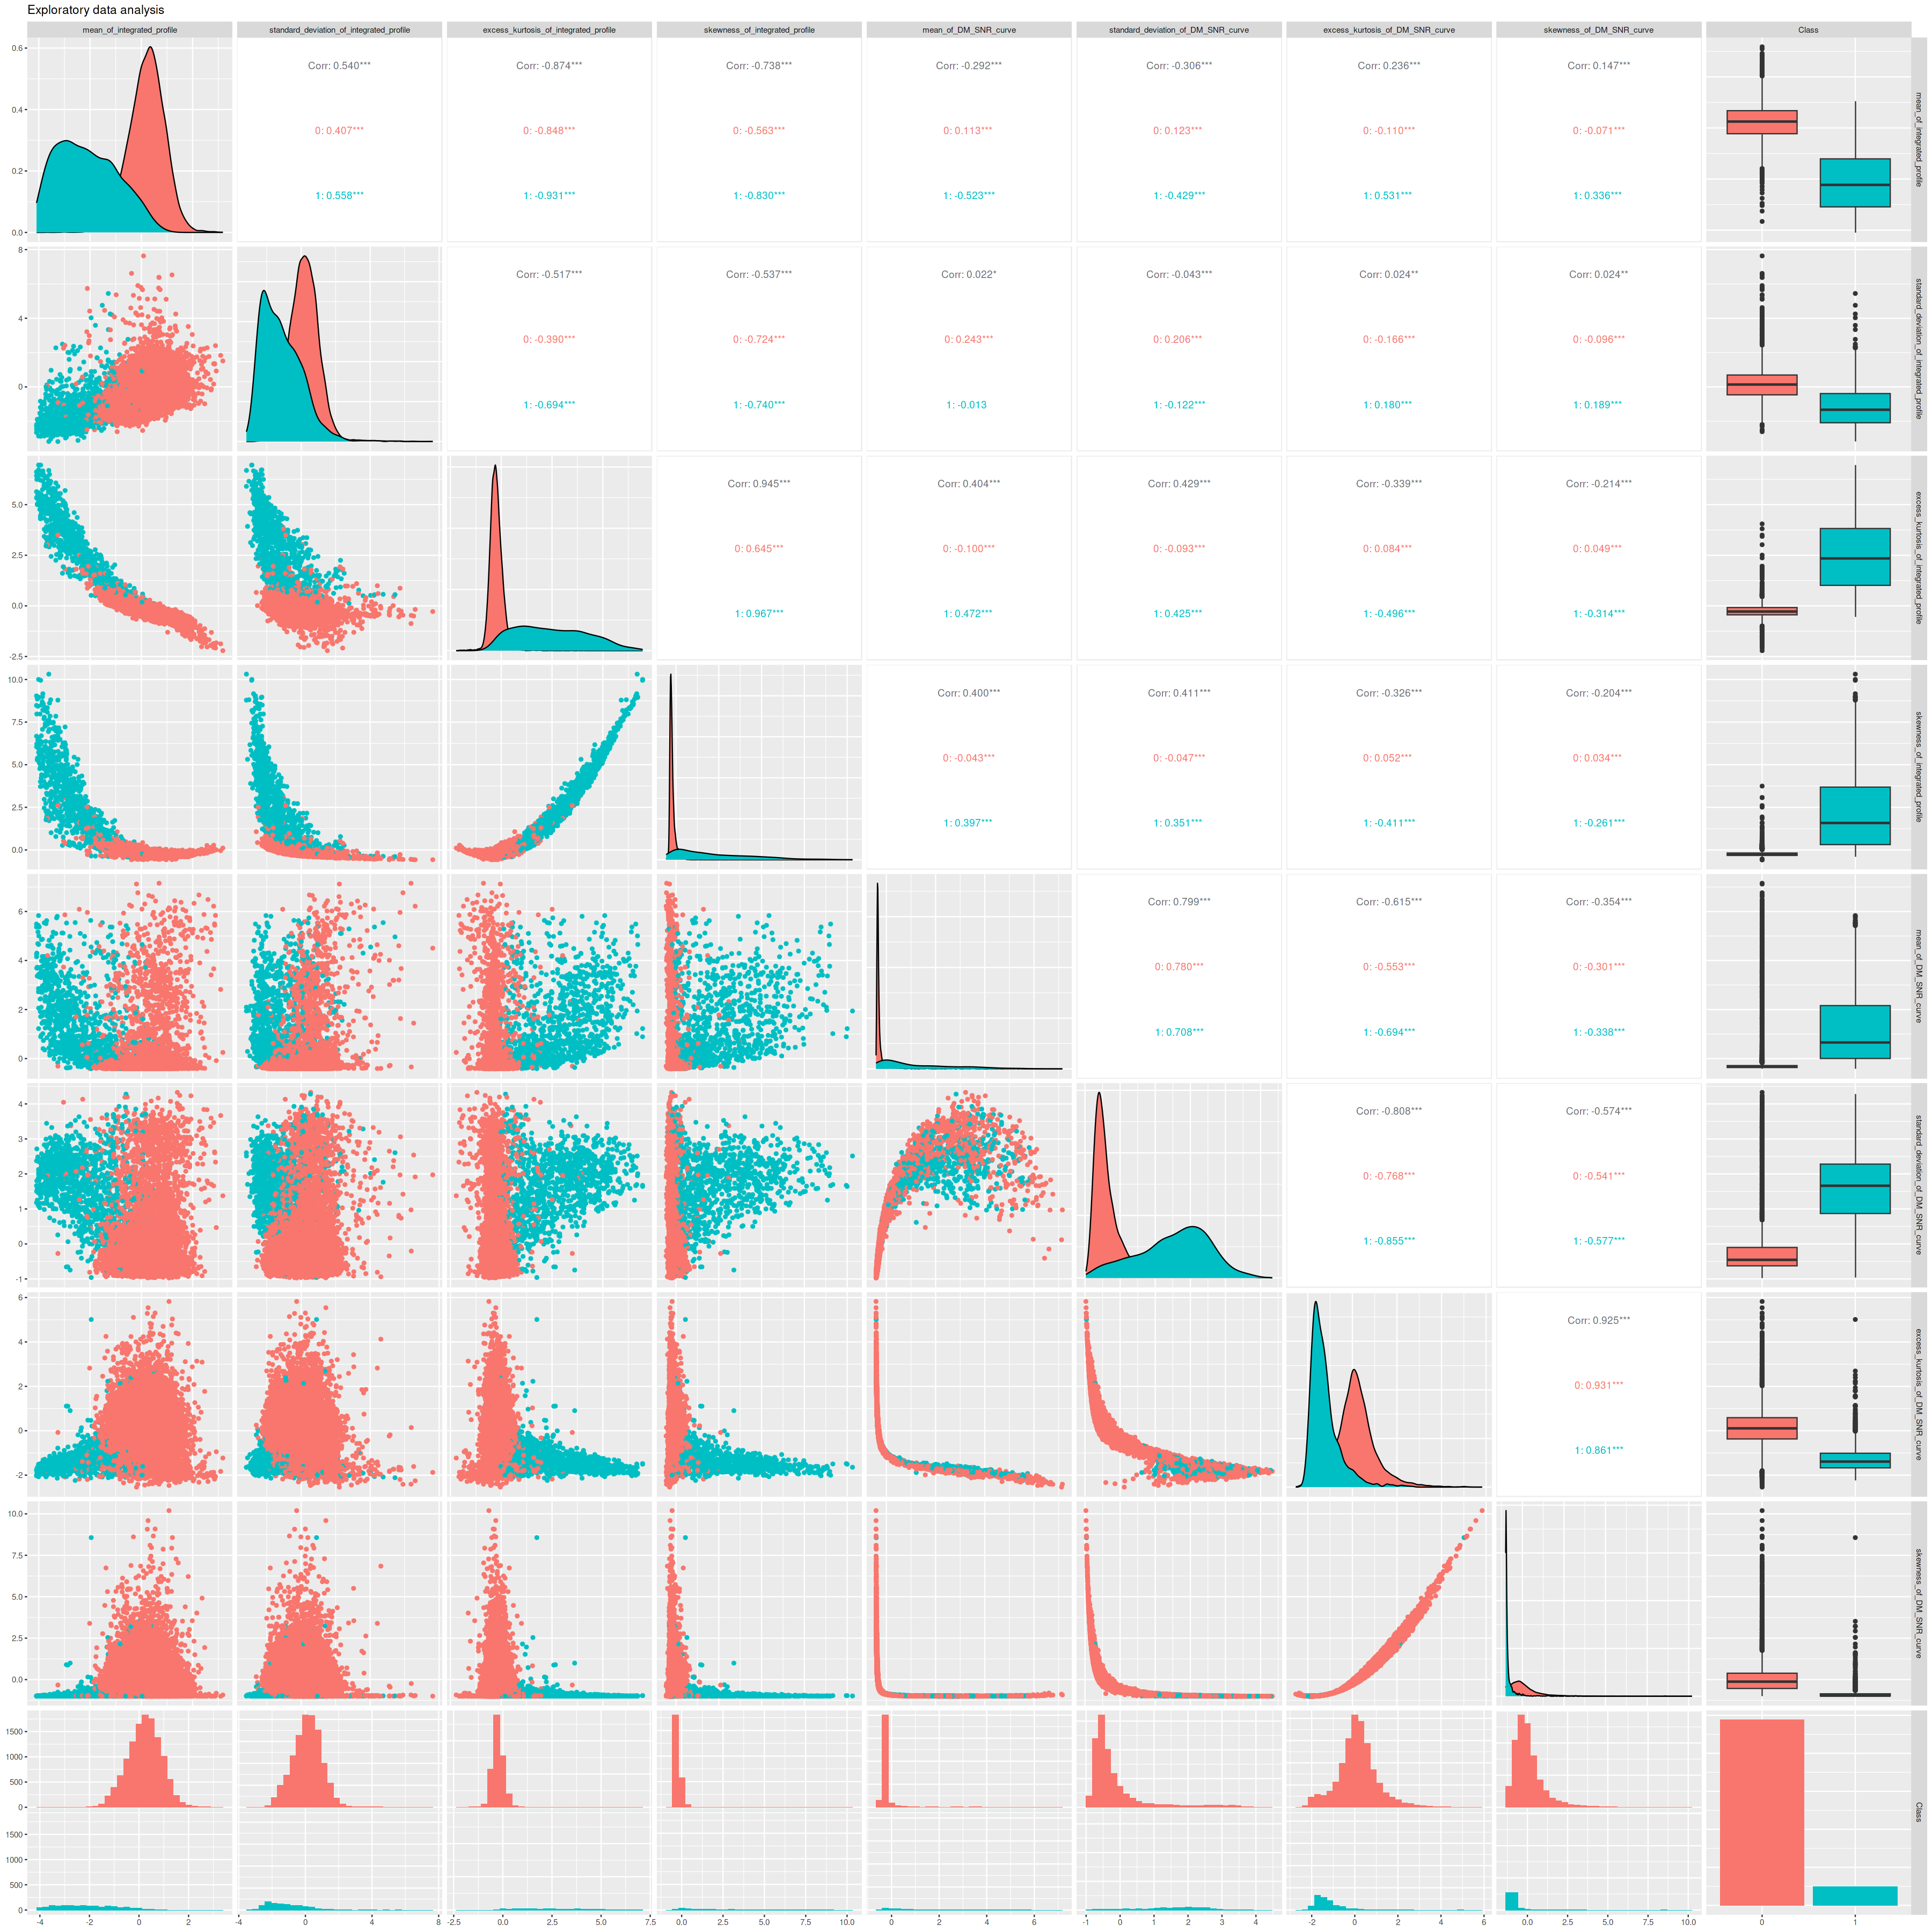

In [83]:
#Looking at the data:

options(repr.plot.width = 30, repr.plot.height = 30)
pairs_plot <- pulsar_train |>
ggpairs(aes(color = Class)) +
ggtitle("Figure 1: Exploratory data analysis")
pairs_plot

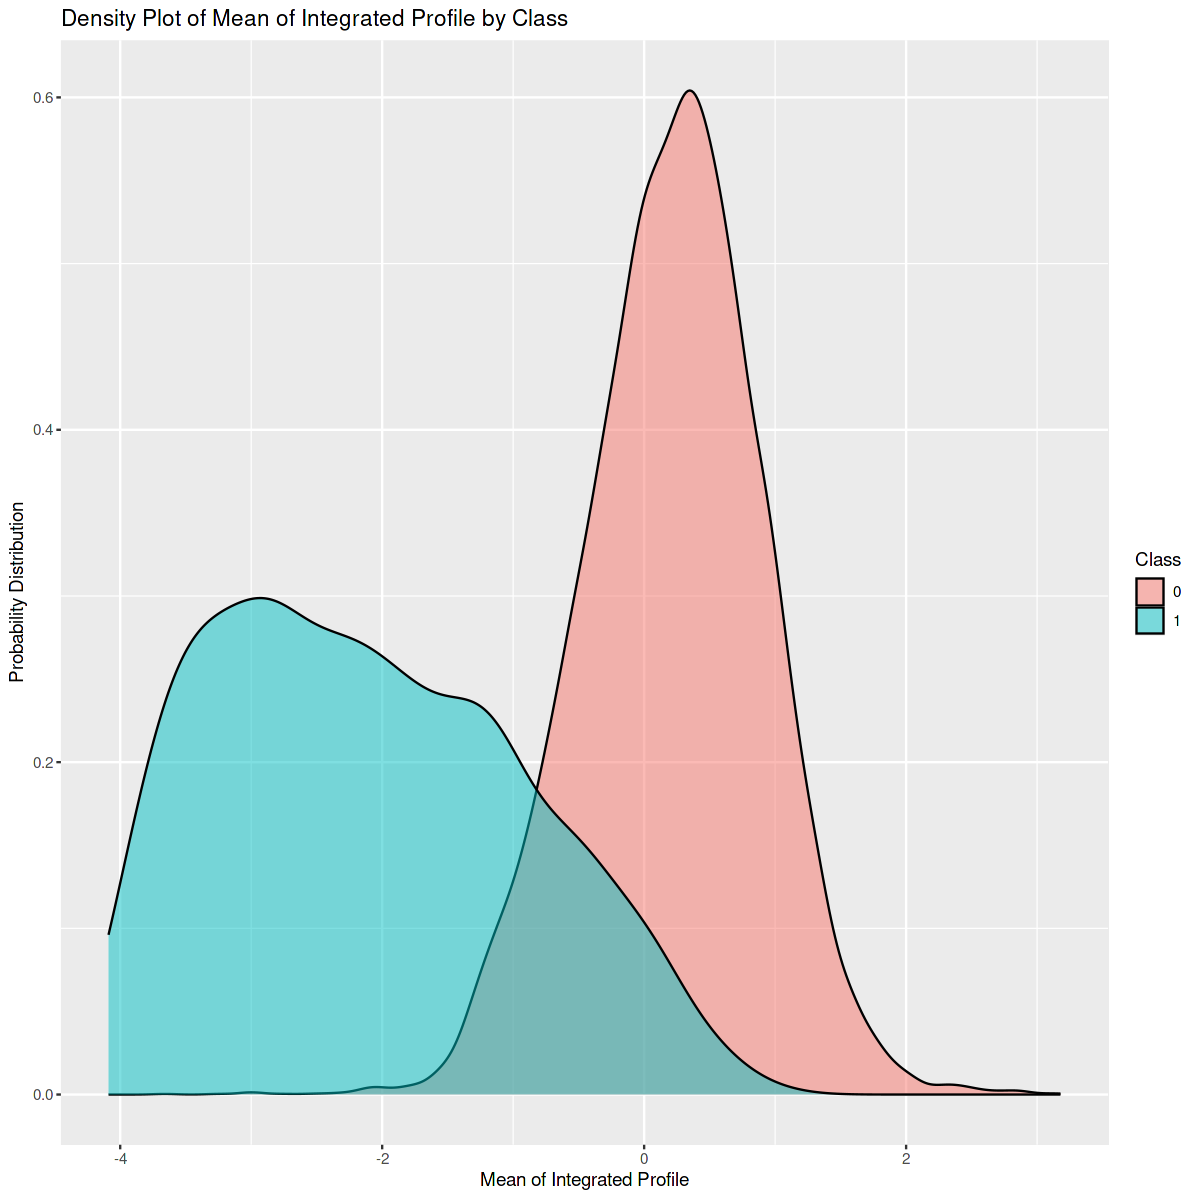

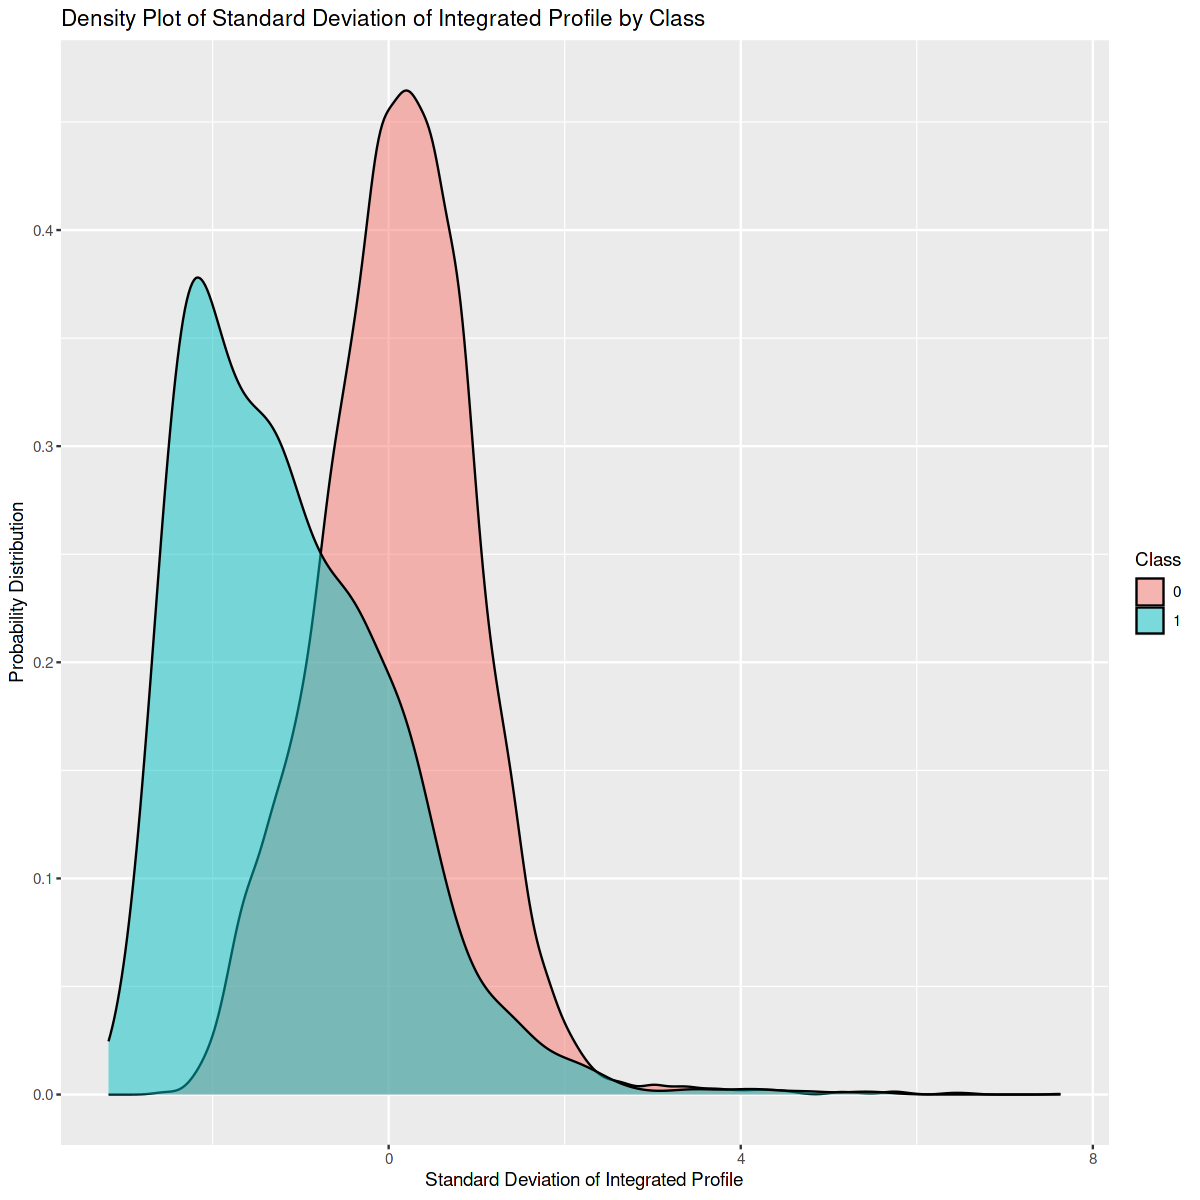

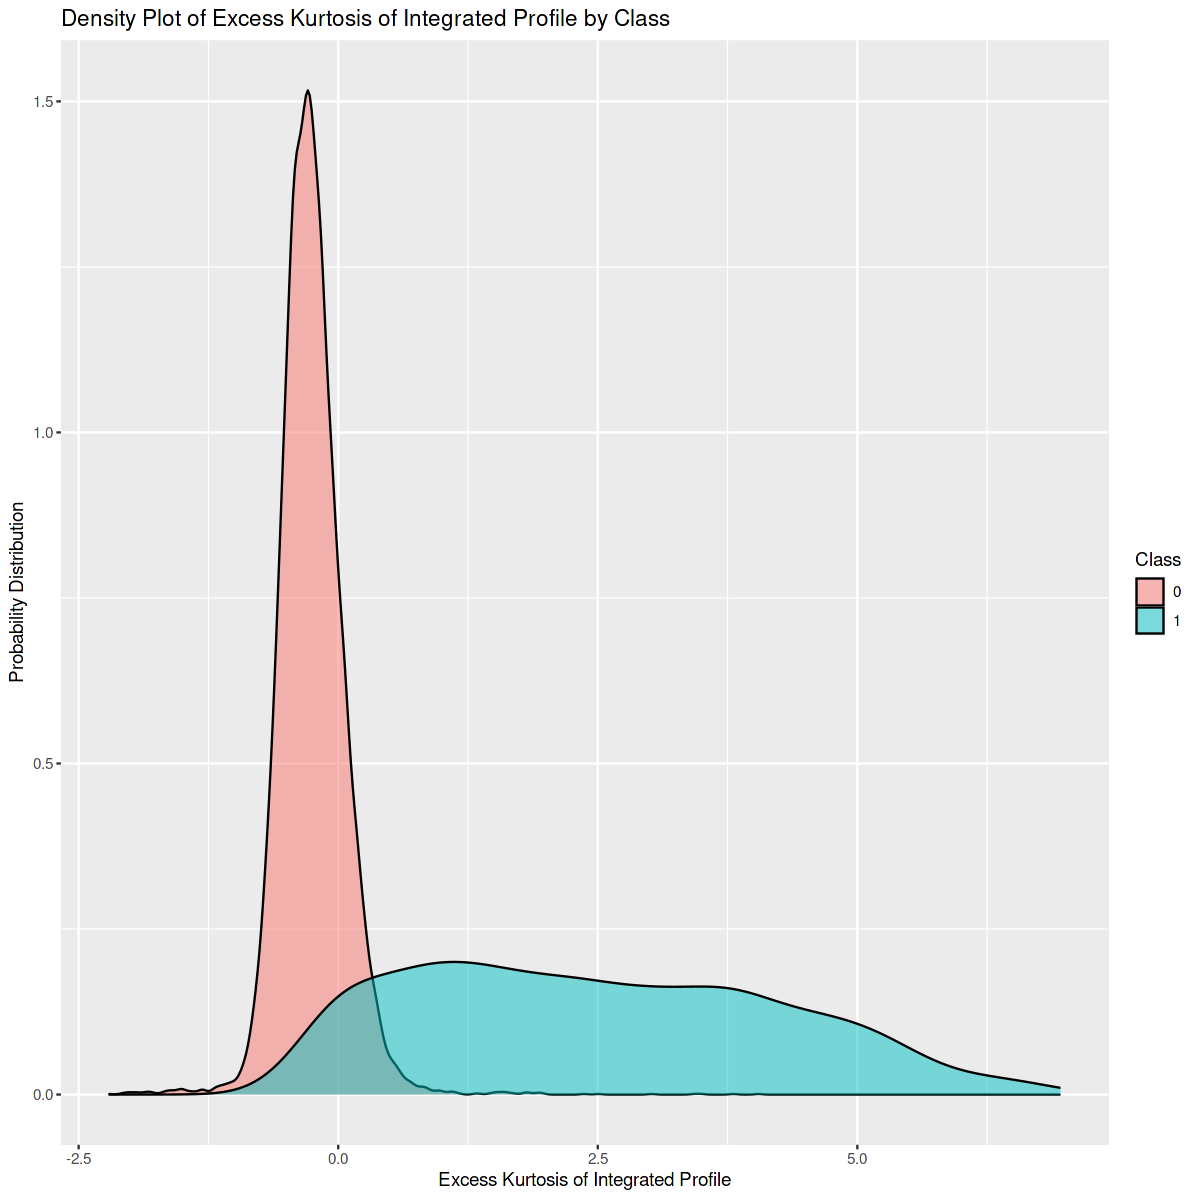

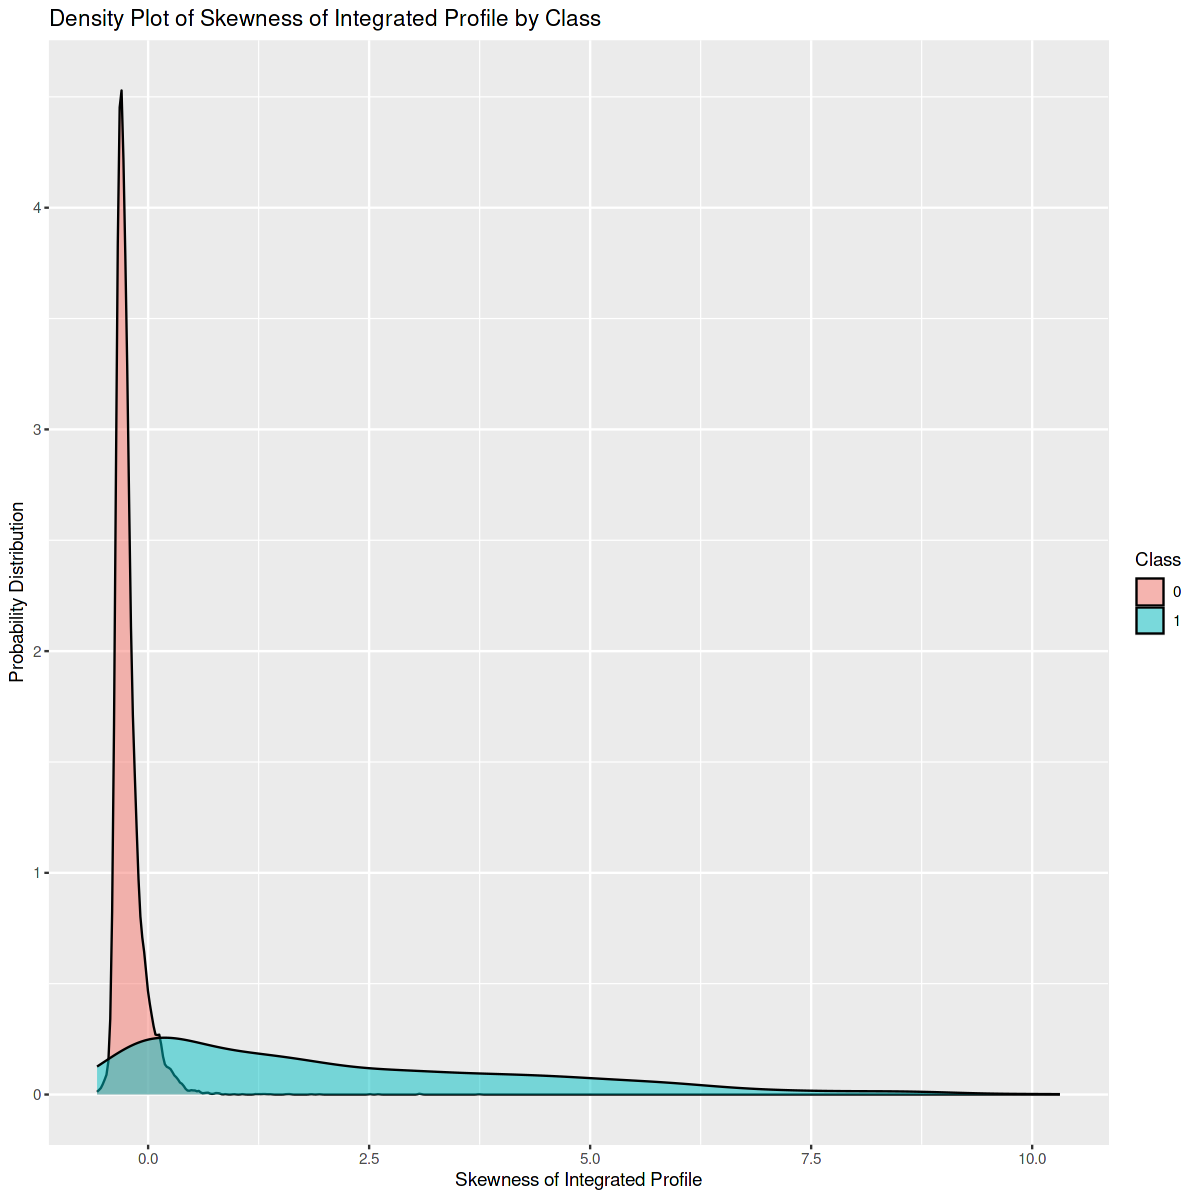

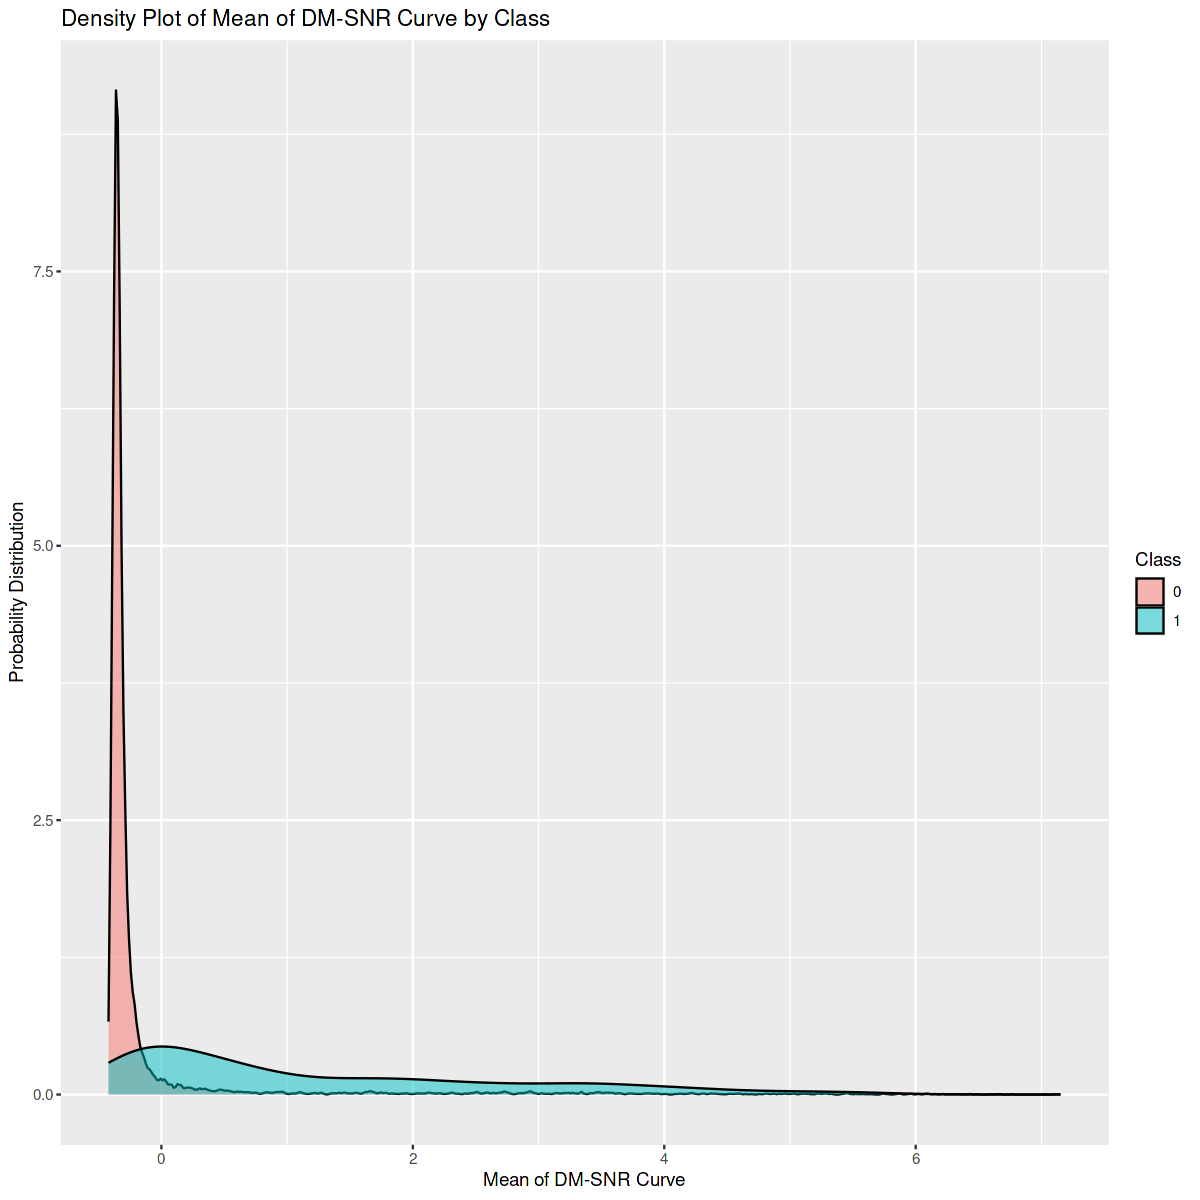

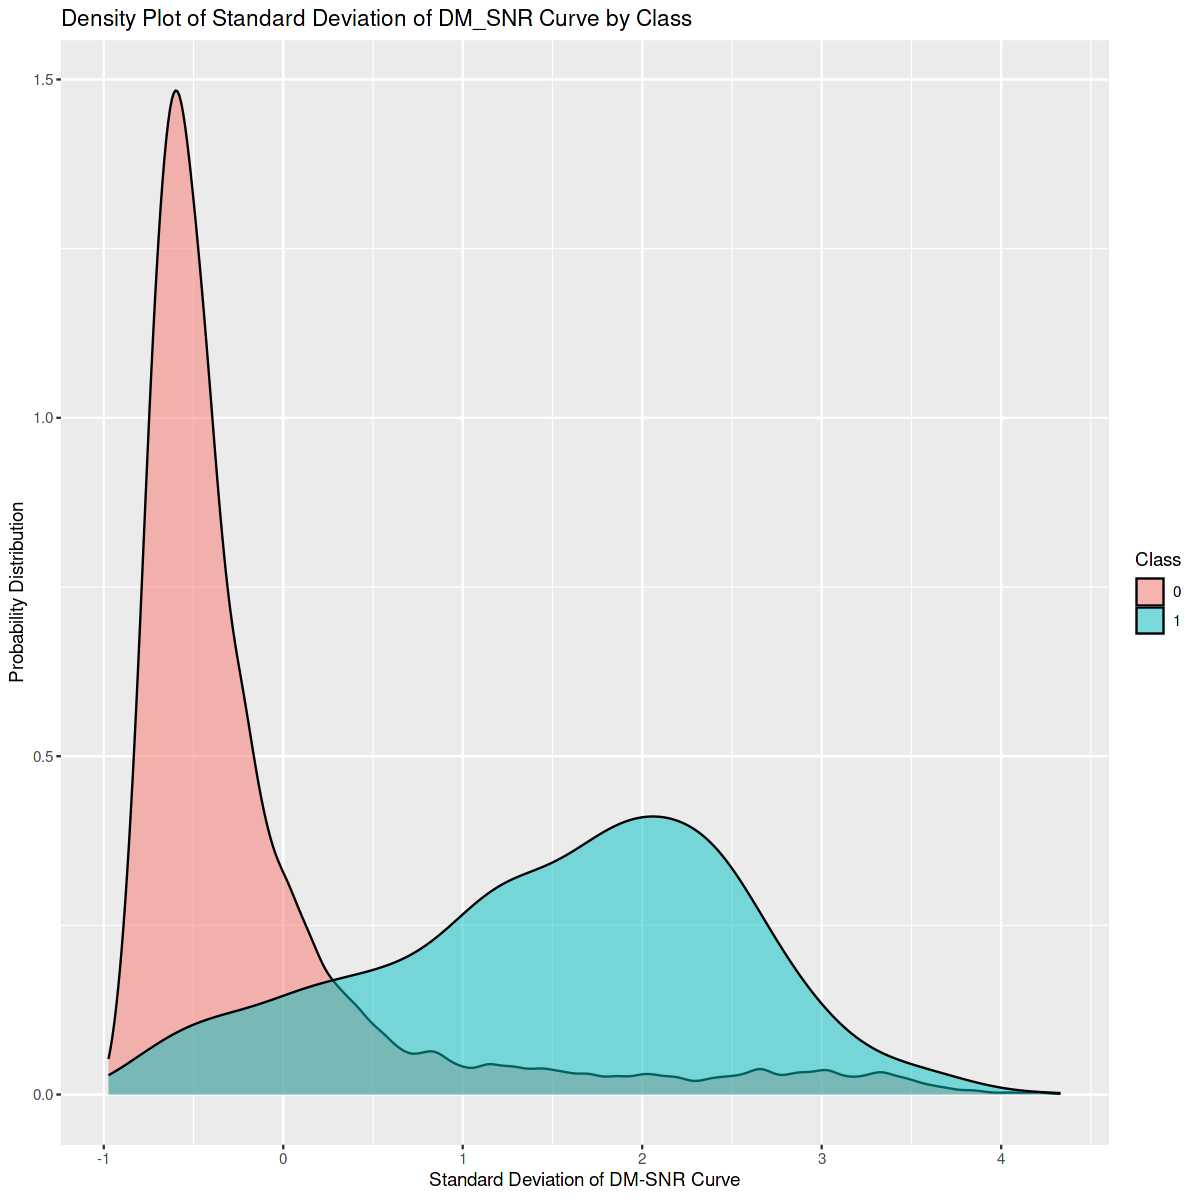

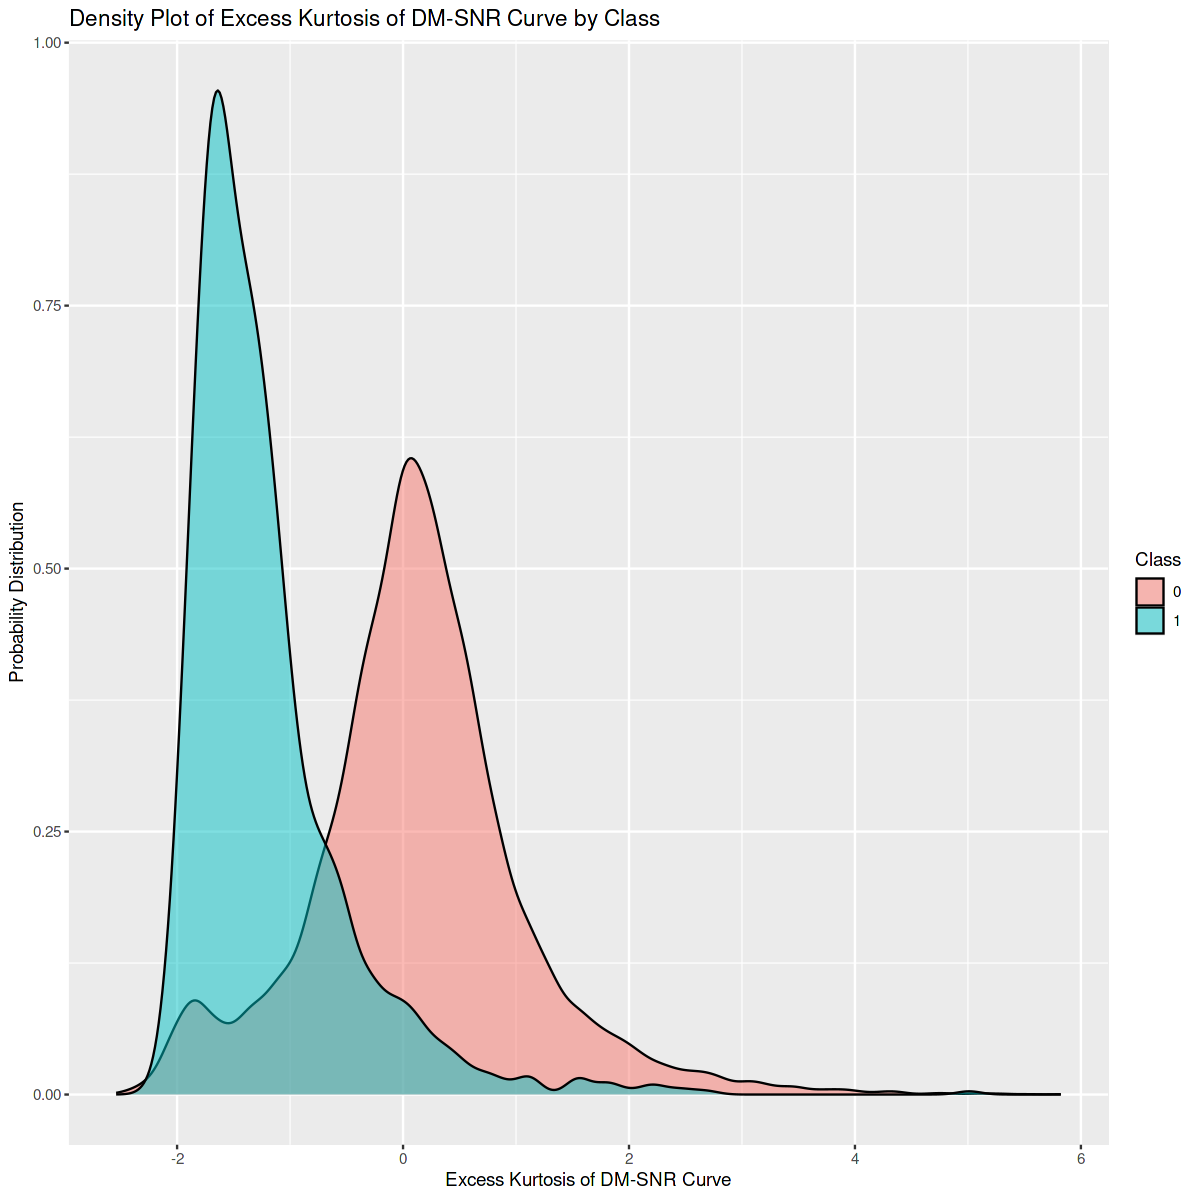

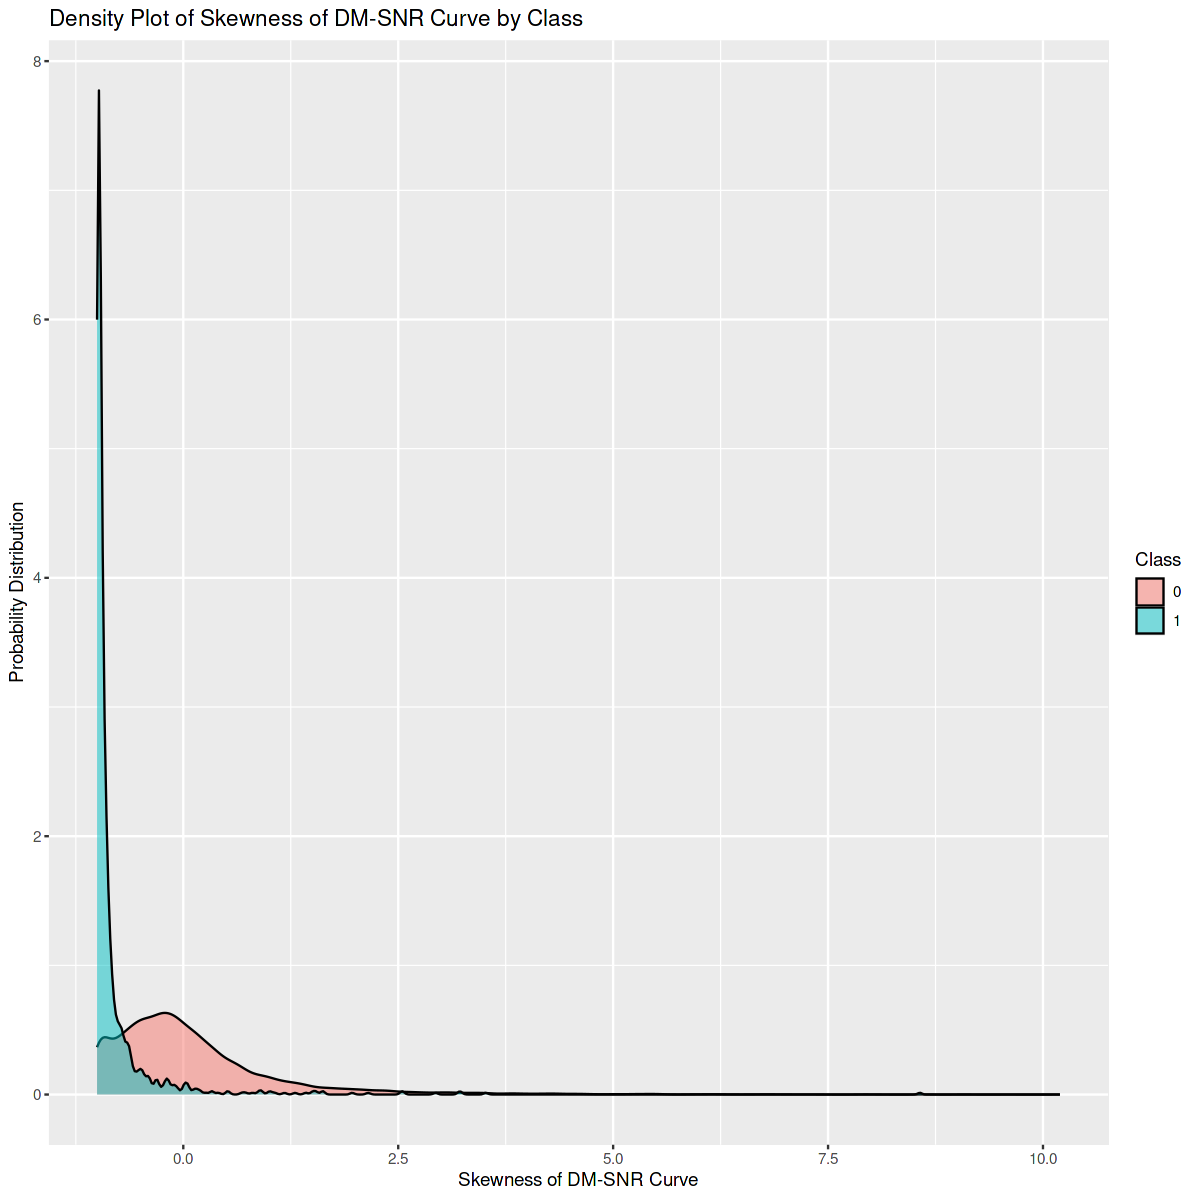

In [91]:

options(repr.plot.width = 10, repr.plot.height = 10)
#generate plots necessary for analysis

ggplot(pulsar_train, aes(x = mean_of_integrated_profile, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Mean of Integrated Profile by Class",
       x = "Mean of Integrated Profile", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = standard_deviation_of_integrated_profile, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Standard Deviation of Integrated Profile by Class",
       x = "Standard Deviation of Integrated Profile", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = excess_kurtosis_of_integrated_profile, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Excess Kurtosis of Integrated Profile by Class",
       x = "Excess Kurtosis of Integrated Profile", y = "Probability Distribution")
ggplot(pulsar_train, aes(x = skewness_of_integrated_profile, fill = Class))+
  xlab("Mean of DM-SNR curve") +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Skewness of Integrated Profile by Class",
       x = "Skewness of Integrated Profile", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = mean_of_DM_SNR_curve, fill = Class)) +
  xlab("Mean of DM-SNR curve") +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Mean of DM-SNR Curve by Class",
       x = "Mean of DM-SNR Curve", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = standard_deviation_of_DM_SNR_curve, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Standard Deviation of DM_SNR Curve by Class",
       x = "Standard Deviation of DM-SNR Curve", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = excess_kurtosis_of_DM_SNR_curve, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Excess Kurtosis of DM-SNR Curve by Class",
       x = "Excess Kurtosis of DM-SNR Curve", y = "Probability Distribution")

ggplot(pulsar_train, aes(x = skewness_of_DM_SNR_curve, fill = Class)) +
  geom_density(alpha = 0.5) +
  labs(title = "Density Plot of Skewness of DM-SNR Curve by Class",
       x = "Skewness of DM-SNR Curve", y = "Probability Distribution")



Figures 2-9 

While Figures 1-9 show us that while all variables are generally okay for classification, the standard deviation of the integrated profile has alot of overlap and we should not include it for classification.

## Method:

For our methodology, the raw data was loaded from the web into R to be a readable dataset, and data was wrangled into a tidy format. We will use the classification algorithm to determine the class of Pulsar candidates, with class labels 0 (negative) or 1 (positive). 8 continuous variables are used to identify the class, which are the mean, standard deviation, excess kurtosis, and skewness of the integrated profile and the DM-SNR curve separately. 

To visualize results, we will use a confusion matrix to show the proportion of legitimate and spurious Pulsars as both variables are categorical. If needed, we will also display these proportions in a bar chart for a clearer graphical comparison to support any significant conclusions.


## Expected outcomes and significance:

We expect to find a way to classify whether the pulsar candidate is legitimate or not using 8 continuous variables: the mean, standard deviation, excess kurtosis, and skewness of the integrated profile and the DM-SNR curve separately. We expect that this classification of pulsar legitimacy will be effective, and that most predicted values will match actual values. 

Such findings would entail greater reproducibility and reliability in the prediction of pulsar legitimacy, which can greatly facilitate any further analysis on this data. Additionally, on a larger scale, this will be of great significance to researchers and astronomers interested in the use of pulsars as detection methods for space and matter. This could lead to future questions on how we can identify magnetars using emission patterns, and new techniques to do so (like with predictions of pulsar legitimacy).


In [26]:
#observe data using glimpse
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 9
$ mean_of_integrated_profile               <dbl> -0.33415887, -0.31436338, 1.0…
$ standard_deviation_of_integrated_profile <dbl> 1.80221498, -1.05329280, 1.55…
$ excess_kurtosis_of_integrated_profile    <dbl> -0.011784432, -0.145228501, -…
$ skewness_of_integrated_profile           <dbl> -0.37052514, -0.11658960, -0.…
$ mean_of_DM_SNR_curve                     <dbl> -0.37109152, -0.32209803, -0.…
$ standard_deviation_of_DM_SNR_curve       <dbl> -0.58890765, -0.23532159, -0.…
$ excess_kurtosis_of_DM_SNR_curve          <dbl> 0.5044128470, -0.1259925717, …
$ skewness_of_DM_SNR_curve                 <dbl> 0.21157554, -0.39136253, -0.4…
$ Class                                    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
Rows: 4,475
Columns: 9
$ mean_of_integrated_profile               <dbl> 1.14928492, 0.86453436, 1.056…
$ standard_deviation_of_integrated_profile <dbl> 1.33479435, -0.36405361, 0.72…
$ excess_kurtosis_of_integrated_profile    <dbl> -0.66955083, -0.52527844

In [93]:
pulsar_dist <- pulsar_train |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(pulsar_train))
                      
pulsar_dist2 <- pulsar_test |>
                      group_by(Class) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(pulsar_test))

pulsar_dist
pulsar_dist2
print("Tables 4 and 5; There is a roughly even split of class between the testing and training sets")

Class,n,percent
<fct>,<int>,<dbl>
0,12209,90.955822
1,1214,9.044178


Class,n,percent
<fct>,<int>,<dbl>
0,4050,90.502793
1,425,9.497207


[1] "Tables 4 and 5; There is a roughly even split of class between the testing and training sets"


Now we will make the recipe.

In [33]:
pulsar_recipe <- recipe(Class ~ mean_of_integrated_profile + excess_kurtosis_of_integrated_profile + skewness_of_integrated_profile +
                          mean_of_DM_SNR_curve + standard_deviation_of_DM_SNR_curve +
                          excess_kurtosis_of_DM_SNR_curve + skewness_of_DM_SNR_curve, data = pulsar_train) |>
  step_normalize(all_predictors()) |>
  step_upsample(Class, over_ratio = 1, skip = TRUE)


print(pulsar_recipe)




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Operations 

• Centering and scaling for: all_predictors()

• Up-sampling based on: Class



In [57]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

pulsar_vfold <- vfold_cv(pulsar_train, v = 10, strata = Class)

knn_workflow <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(knn_spec)


We now create a workflow and test it against different values of *k* from 1 to 100, with a step of 5, to figure out the optimum number of neighbours.

In [95]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_inter <- knn_workflow |>
  tune_grid(resamples = pulsar_vfold, grid = k_vals)

knn_results <- knn_inter |> collect_metrics()

accuracies <- knn_results |>
  filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9681145,10,0.001884087,Preprocessor1_Model01
6,accuracy,binary,0.9550775,10,0.001813861,Preprocessor1_Model02
11,accuracy,binary,0.9345156,10,0.002081142,Preprocessor1_Model03
16,accuracy,binary,0.9288535,10,0.002466036,Preprocessor1_Model04
21,accuracy,binary,0.9368248,10,0.001522065,Preprocessor1_Model05
26,accuracy,binary,0.9447957,10,0.001586468,Preprocessor1_Model06
31,accuracy,binary,0.9526183,10,0.001193580,Preprocessor1_Model07
36,accuracy,binary,0.9544057,10,0.001764522,Preprocessor1_Model08
41,accuracy,binary,0.9552249,10,0.001928113,Preprocessor1_Model09


Table 6

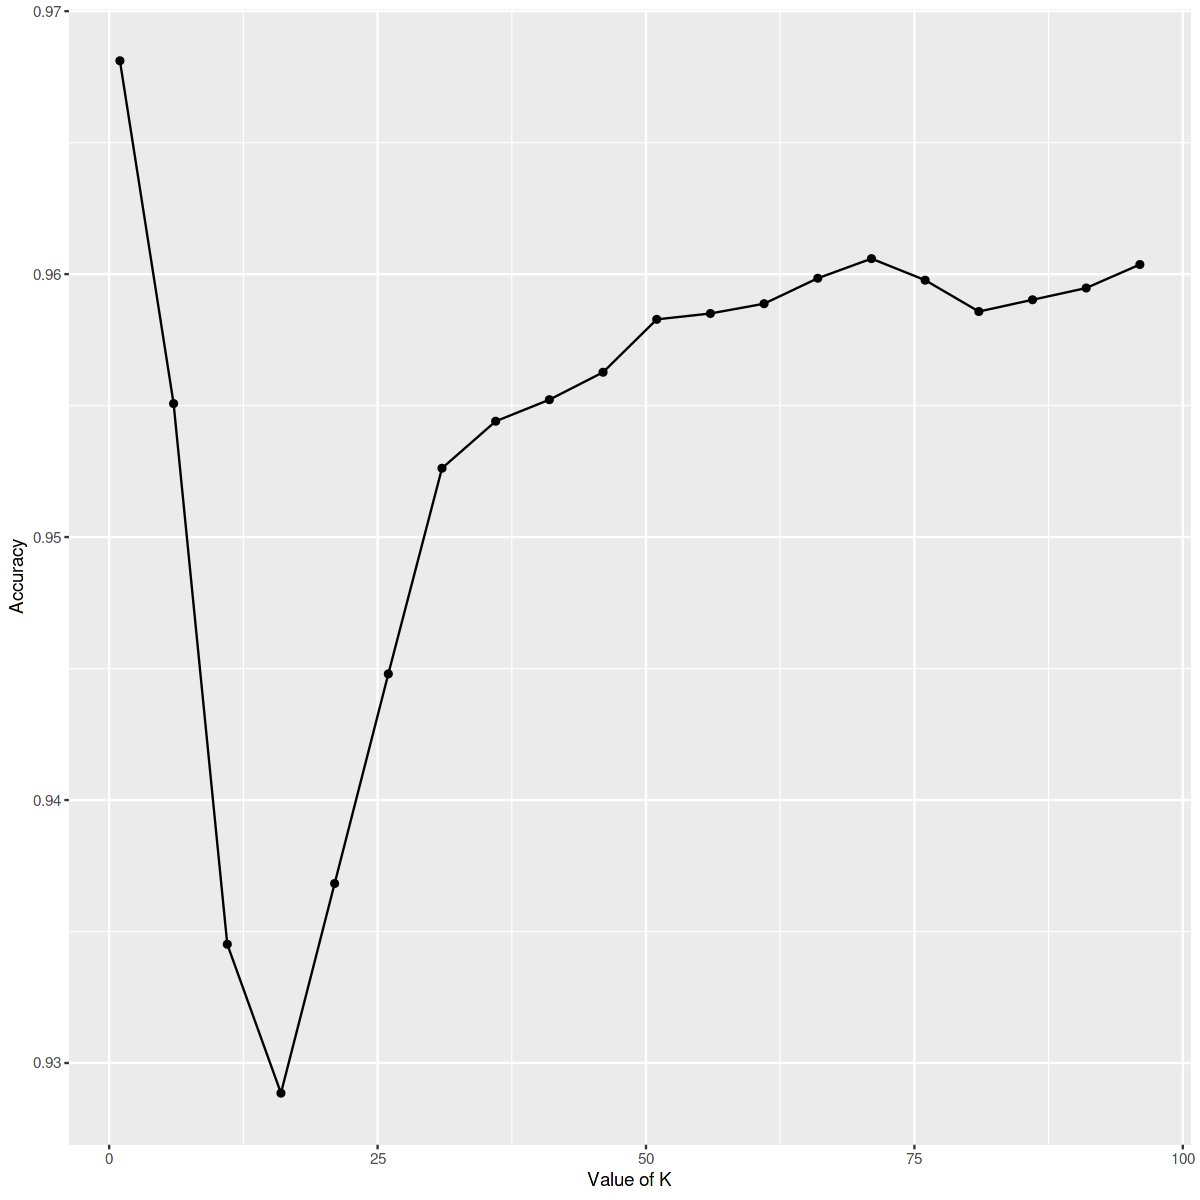

In [94]:
options(repr.plot.width = 10, repr.plot.height = 10)
accuracy_plot <- accuracies |> ggplot(aes(x = neighbors, y = mean)) + geom_point() + geom_line() + labs(x = "Value of K", y = "Accuracy")
accuracy_plot

Figure 10, shows accuracy against neighbours value (k).

We can see that while the maximum accuracy is at *k = 1*, this will likely overfit the data and the model might perform poorly with pulsar data from another source, for example.So to acheive a good balance between not overfitting and underfitting we will use *k = 31* as this value to make our model going forward. (The gradient becomes less steep at k = 31, as our graph shows)

In [73]:
knn_spec_31 <- nearest_neighbor(weight_func = "rectangular", neighbors = 31) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_workflow_31 <- workflow() |>
  add_recipe(pulsar_recipe) |>
  add_model(knn_spec_31)


We fit the model onto the testing data in order to evaluate its performance.

In [74]:
kknn_fit_31 <- fit(knn_workflow_31, data = pulsar_train)


pulsar_test_predictions <- predict(kknn_fit_31, pulsar_test) |>
  bind_cols(pulsar_test)

pulsar_test_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")
confusion <- pulsar_test_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9519553


.pred_class,mean_of_integrated_profile,standard_deviation_of_integrated_profile,excess_kurtosis_of_integrated_profile,skewness_of_integrated_profile,mean_of_DM_SNR_curve,standard_deviation_of_DM_SNR_curve,excess_kurtosis_of_DM_SNR_curve,skewness_of_DM_SNR_curve,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,1.14928492,1.33479435,-0.66955083,-0.40044782,-0.3194313,-0.370615113,-0.07279575,-0.28743009,0
0,0.86453436,-0.36405361,-0.52527844,-0.26831076,-0.3726235,-0.735402575,0.81412244,0.85139305,0
0,1.05639837,0.72699317,-0.47903248,-0.27942705,-0.2132173,0.269629055,-0.69852465,-0.73900144,0
0,-0.59302301,-0.65606973,-0.14235403,-0.15674300,-0.3658149,-0.723016508,0.65373165,0.67946651,0
0,0.24508771,1.07538773,-0.20666881,-0.35268461,-0.2237990,-0.080141011,-0.77578820,-0.74482877,0
0,0.32579241,0.92431809,-0.45149304,-0.36165218,-0.3477437,-0.504786539,0.15640955,-0.09484200,0
0,0.47288815,0.66174999,-0.28051626,-0.31575739,-0.3565098,-0.483023376,0.39430559,0.07229889,0
0,-0.32989522,0.45926277,-0.23252729,-0.25567053,-0.3774746,-0.530138666,0.96380162,0.62878921,0
0,-0.03783557,-0.76446250,-0.35994602,-0.17626162,-0.3937301,-0.683094429,1.41207834,1.18618949,0


          Truth
Prediction    0    1
         0 3892   48
         1  167  368

Tables 7 and 8: show us the predicted class appended to the pulsar test set.

The confusion matrix shows us the split between false positives, true postives, false negatives and true negatives that the model comes up with. We can now confirm
that the accuracy of the model is indeed 95.3%.

(3892+368)/(3892+368+48+167) = 0.953



## Discussion:
Based on the analysis using K-nearest neighbors (KNN) to classify pulsars with class labels of 1 or 0, and the density plots of the 8 variables, it appears that there is significant overlap between class 1 and class 0 in the standard deviation of integrated profile. This suggests that the standard deviation of integrated profile may not be a strong predictor for distinguishing between pulsars and non-pulsars in this dataset. Additionally,  the accuracy of the K-nearest neighbor (KNN) algorithm is 95.3%, which indicates that the algorithm performed well in classifying the pulsars.The high accuracy of KNN algorithm and clear visual plots can classify whether the class is 0 or 1, which is used to determine the pulsar.
The impact of such findings could be significant for the field of astrophysics and pulsar research. Accurate classification of pulsar candidates as legitimate or not can help astronomers and researchers in identifying potential new pulsars with higher confidence, leading to more accurate and efficient pulsar detection and characterization. This can contribute to our understanding of pulsar properties, evolution, and their role in the universe.
These findings could also raise future questions and avenues for further research. For example, additional investigations could be done to understand the underlying physical or astrophysical reasons for the observed differences in the distributions of the continuous variables between the two classes. Further analysis and modeling could also be performed to identify the most important features or combinations of features for pulsar classification, and to optimize the performance of the classification models. Additionally, the findings could potentially inspire new research on developing novel techniques or algorithms for pulsar classification, leveraging the insights gained from the current analysis.

## References:
Lyne, A. G., Graham-Smith, F., Stappers, B., & Cambridge Core EBA eBooks Complete Collection. (2022). Pulsar astronomy (5th ed.). Cambridge University Press. https://doi.org/10.1017/9781108861656

Zhang, C. J., Shang, Z. H., Chen, W. M., Xie, L., & Miao, X. H. (2020). A review of research on pulsar candidate recognition based on machine learning. Procedia Computer Science, 166, 534-538.


Raj, P. (2020). Predicting Pulsar Star. Co-Learning Lounge. https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

